<b><font size="5">1. Linear Regression - Data and Initialization</font></b>

In this step, we define the data that will be used to build the linear regression model. The data consists of two variables: the size of the house (in square feet) and the price of the house (in dollars).

**X (Features)**: This represents the house sizes (in sqft). We also normalize this feature to make sure it has a mean of 0 and a standard deviation of 1, which helps gradient descent converge faster.

**y (Target)**: This represents the house prices, the values we want to predict.

**X Matrix**: We add a column of 1s to the feature matrix X to account for the intercept term (θ₀) in the linear regression model. This step ensures that our model has both a slope (for the feature) and an intercept (the constant term).

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data (Size in sqft and Price in $)
X = np.array([1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500])  # Size in sqft
y = np.array([400000, 500000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1050000, 1100000, 1150000, 1200000])  # Price in $

# Normalize the feature X
X_norm = (X - np.mean(X)) / np.std(X)  # Normalize X
X = np.vstack([np.ones(len(X_norm)), X_norm]).T  # Add a column of 1s for the intercept term


<b><font size="5">2. Cost Function</font></b>

The **Cost Function** (also known as the Mean Squared Error) measures how well the model’s predictions align with the actual data. A lower cost means the model is doing a better job at predicting prices.

**Predictions**: We calculate predictions for the house prices by multiplying the feature matrix X with the model's parameters θ (theta).

**Errors**: The difference between the predicted prices and actual house prices.

**Cost Calculation**: The Mean Squared Error is calculated by taking the average of the squared differences between predicted values and actual values. The division by 2 is just for mathematical convenience when deriving gradients.

In [21]:
# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = X.dot(theta)  # Predicted prices
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))  # Mean Squared Error
    return cost


<b><font size="5">3. Gradient Descent</font></b>

**Gradient Descent** is the optimization algorithm that adjusts the model’s parameters (θ) to minimize the cost function. The goal is to find the values of θ₀ (intercept) and θ₁ (slope) that result in the lowest cost.

**Learning Rate**: A small positive value that determines how big the steps are during each update of the parameters.

**Iterations**: The number of times we update the parameters. More iterations generally lead to a better result, but it also increases computational cost.

The gradient descent algorithm works by computing the derivative of the cost function with respect to θ, which tells us the direction to move in to reduce the cost. We then update θ in the opposite direction of the gradient.

In [22]:
# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)  # Predicted prices
        errors = predictions - y  # Difference between predicted and actual prices
        theta = theta - (learning_rate/m) * X.T.dot(errors)  # Update theta
        cost_history[i] = compute_cost(X, y, theta)  # Store the cost for each iteration

    return theta, cost_history


<b><font size="5">4. Running the Gradient Descent</font></b>

Now that we have the gradient descent function, we can run the algorithm to find the optimal values for the model's parameters (θ₀ and θ₁).

**Theta Initialization**: We initialize θ to zeros. This is a common starting point, but other initializations are possible.

**Training the Model**: We call the gradient_descent function with the training data X and y, along with the initial values of θ, learning rate, and number of iterations. This will optimize θ to fit the linear regression model.

In [23]:
# Initialize theta (parameters for linear regression)
theta = np.zeros(2)  # Two parameters: intercept and slope

# Gradient descent parameters
learning_rate = 0.01  # Smaller learning rate to avoid overshooting
iterations = 1000  # Number of iterations

# Perform gradient descent to fit the model
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)


<b><font size="5">5. Plotting Cost Function Minimization</font></b>

This plot visualizes how the **cost** decreases over time as gradient descent improves the model.

**X-Axis**: The number of iterations of gradient descent.

**Y-Axis**: The cost value (mean squared error).

As gradient descent progresses, the cost should decrease, showing that the model is improving.

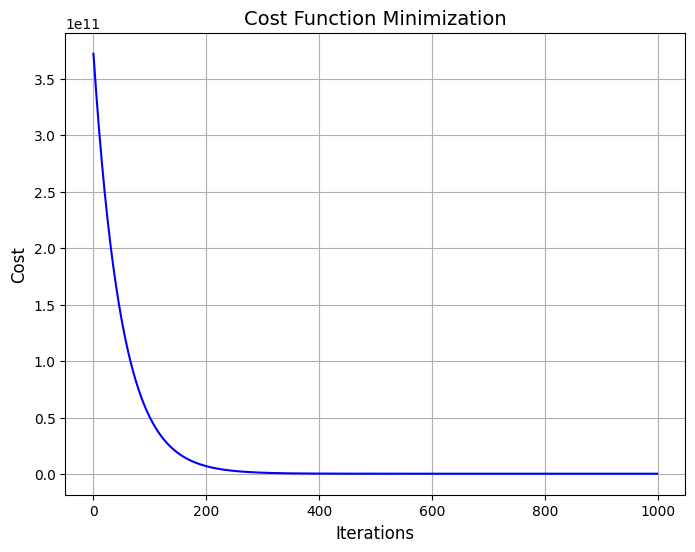

In [24]:
# Plot the cost history
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.title("Cost Function Minimization", fontsize=14)
plt.grid(True)
plt.show()


<b><font size="5">6. Plotting Scatter Plot with Fitted Line</font></b>

Finally, we visualize the **fitted regression line** on top of the data points. This gives us an intuitive understanding of how well the linear regression model fits the data.

**Data Points**: Represented as blue dots on the plot, showing the actual house sizes and prices.

**Fitted Line**: The red line is the regression line, which represents the predicted house prices based on the model's parameters (θ).

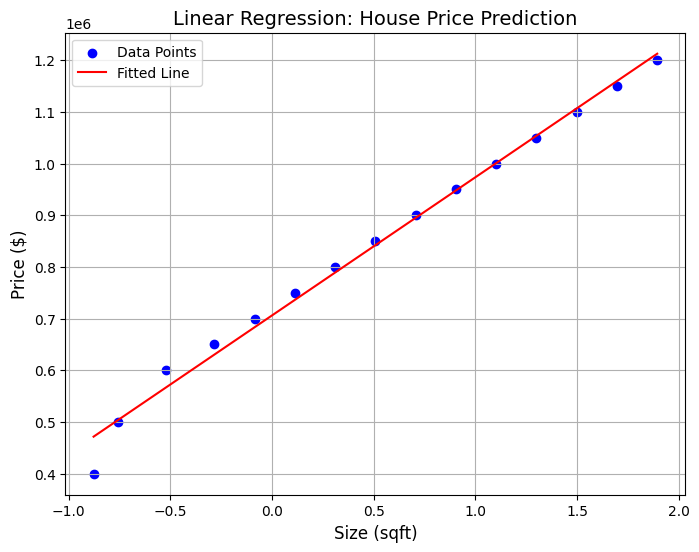

In [25]:
# Plot the data points and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1] * np.std(X) + np.mean(X), y, color='blue', label='Data Points')  # Reverse normalization for original scale
plt.plot(X[:, 1] * np.std(X) + np.mean(X), X.dot(theta), color='red', label='Fitted Line')  # Plot fitted line
plt.xlabel("Size (sqft)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.title("Linear Regression: House Price Prediction", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


This plot helps us see how well the linear regression model fits the house pricing data, showing the relationship between house size and price. The closer the red line is to the blue dots, the better the model's predictions.